In [6]:
# Import library yang diperlukan
import pandas as pd

In [7]:
# Load data ke dalam data frame dan spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('perbandingan_kelas_sentistrength.csv', encoding='latin-1') 

df.head()

,kelas_skns,kelas_sks,kelas_sns,kelas_ss
0,positif,positif,positif,positif
1,positif,positif,positif,positif
2,negatif,negatif,negatif,negatif
3,negatif,negatif,negatif,negatif
4,positif,negatif,positif,negatif


In [8]:
# Cek jumlah data per kelas
print(df['kelas_skns'].value_counts())
print('\n')
print(df['kelas_sks'].value_counts())
print('\n')
print(df['kelas_sns'].value_counts())
print('\n')
print(df['kelas_ss'].value_counts())

positif    142
netral      58
negatif     47
Name: kelas_skns, dtype: int64


positif    141
netral      61
negatif     45
Name: kelas_sks, dtype: int64


positif    143
netral      57
negatif     47
Name: kelas_sns, dtype: int64


positif    142
netral      60
negatif     45
Name: kelas_ss, dtype: int64


In [10]:
# Data untuk label
new_labels = {
    'negatif' : 0,
    'netral' : 1,
    'positif' : 2
}

# Encode label
df['kelas_skns'] = df['kelas_skns'].map(new_labels)
df['kelas_sks'] = df['kelas_sks'].map(new_labels)
df['kelas_sns'] = df['kelas_sns'].map(new_labels)
df['kelas_ss'] = df['kelas_ss'].map(new_labels)

# Cek data teratas
df.head()

,kelas_skns,kelas_sks,kelas_sns,kelas_ss
0,2,2,2,2
1,2,2,2,2
2,0,0,0,0
3,0,0,0,0
4,2,0,2,0


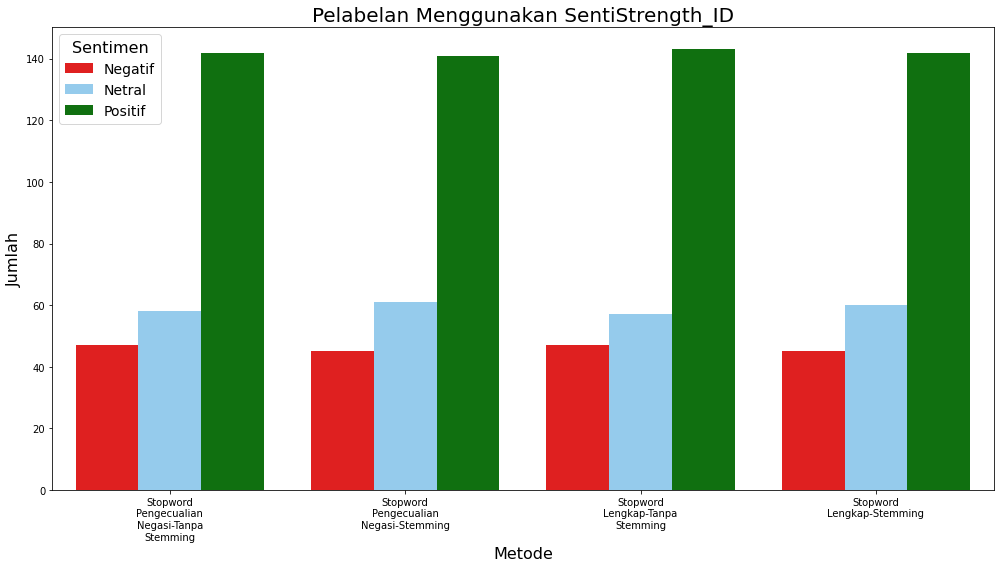

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengganti nama kolom
df.rename(columns={
    'kelas_skns': 'Stopword Pengecualian Negasi - Tanpa Stemming',
    'kelas_sks': 'Stopword Pengecualian Negasi - Stemming',
    'kelas_sns': 'Stopword Lengkap - Tanpa Stemming',
    'kelas_ss': 'Stopword Lengkap - Stemming'
}, inplace=True)

# Mengubah data menjadi format panjang (long format)
df_melted = df.melt(var_name='Kelas', value_name='Sentimen')

# Warna untuk setiap kategori sentimen
palette = {0: 'red', 1: 'lightskyblue', 2: 'green'}

# Visualisasi sentimen dalam satu plot
plt.figure(figsize=(14, 8))
sns.countplot(data=df_melted, x='Kelas', hue='Sentimen', palette=palette)
plt.title('Pelabelan Menggunakan SentiStrength_ID', fontsize=20)
plt.xlabel('Metode', fontsize=16)
plt.ylabel('Jumlah', fontsize=16)

# Menambahkan legenda
plt.legend(title='Sentimen', labels=['Negatif', 'Netral', 'Positif'], fontsize=14, title_fontsize=16)

# Mengatur label x-axis agar menjadi dua baris
ax = plt.gca()
labels = [label.get_text().replace(' ', '\n') for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()